<a href="https://colab.research.google.com/github/gakurujnr/IP_Week_4/blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2019_07_Peter_Gakuru_PythonNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dataset

In [0]:
#Importing of dataset in pandas as numpy
#
#importing pandas
import pandas as pd
##
#importing numpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##
##
#Loading data
##
#Checking out the dataset
#
url = "http://bit.ly/Autolibdataset"
pr = pd.read_csv(url)
pr.head()

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,0,24 Rue Vulpian,3,3,1,0,1,operational,Paris,NaN,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
1,1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,NaN,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,operational,NaN,3,station,ok,nonexistent,2018,4,1,0,0
2,2,4 Rue Charles Bossut,3,3,0,0,1,operational,Paris,NaN,paris-charlesbossut-4,STATION,"48.8431847, 2.3837959",75012,Paris/Charles Bossut/4,operational,NaN,2,station,ok,nonexistent,2018,4,1,0,0
3,3,3 avenue Claude Vellefaux,4,4,0,0,0,operational,Paris,NaN,paris-claudevellefaux-3,STATION,"48.8740623, 2.3703034",75010,Paris/Claude Vellefaux/3,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
4,4,236 Boulevard Voltaire,1,1,0,0,1,operational,Paris,NaN,paris-voltaire-236,STATION,"48.852023, 2.389719",75011,Paris/Voltaire/236,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0


In [3]:
##
#
#Viewing the first few rows
pr.head()

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,0,24 Rue Vulpian,3,3,1,0,1,operational,Paris,NaN,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
1,1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,NaN,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,operational,NaN,3,station,ok,nonexistent,2018,4,1,0,0
2,2,4 Rue Charles Bossut,3,3,0,0,1,operational,Paris,NaN,paris-charlesbossut-4,STATION,"48.8431847, 2.3837959",75012,Paris/Charles Bossut/4,operational,NaN,2,station,ok,nonexistent,2018,4,1,0,0
3,3,3 avenue Claude Vellefaux,4,4,0,0,0,operational,Paris,NaN,paris-claudevellefaux-3,STATION,"48.8740623, 2.3703034",75010,Paris/Claude Vellefaux/3,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
4,4,236 Boulevard Voltaire,1,1,0,0,1,operational,Paris,NaN,paris-voltaire-236,STATION,"48.852023, 2.389719",75011,Paris/Voltaire/236,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0


In [4]:
##
##
#Viewing the information about the given dataset and the number of rows and columns it contains
#It also shows us the datatype and the memory of the whole dataset
#
pr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14421829 entries, 0 to 14421828
Data columns (total 26 columns):
Unnamed: 0             int64
Address                object
Cars                   int64
Bluecar counter        int64
Utilib counter         int64
Utilib 1.4 counter     int64
Charge Slots           int64
Charging Status        object
City                   object
Displayed comment      object
ID                     object
Kind                   object
Geo point              object
Postal code            int64
Public name            object
Rental status          object
Scheduled at           object
Slots                  int64
Station type           object
Status                 object
Subscription status    object
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
dtypes: int64(13), object(13)
memory usage: 2.8+ GB


In [7]:
##
##
#Checking missing values
pr.isnull().count()

Unnamed: 0             14421829
Address                14421829
Cars                   14421829
Bluecar counter        14421829
Utilib counter         14421829
Utilib 1.4 counter     14421829
Charge Slots           14421829
Charging Status        14421829
City                   14421829
Displayed comment      14421829
ID                     14421829
Kind                   14421829
Geo point              14421829
Postal code            14421829
Public name            14421829
Rental status          14421829
Scheduled at           14421829
Slots                  14421829
Station type           14421829
Status                 14421829
Subscription status    14421829
year                   14421829
month                  14421829
day                    14421829
hour                   14421829
minute                 14421829
dtype: int64

In [5]:
##
##
#Checking the shape of the dataframe
pr.shape

(14421829, 26)

In [6]:
##
##Checking the size of the dataframe
#
pr.size

374967554

In [7]:
##
## Displaying some summary statistics of the dataframe
#
pr.describe(include = 'all')

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
count,1.442183e+07,14421829,1.442183e+07,1.442183e+07,1.442183e+07,1.442183e+07,1.442183e+07,14421829,14421829,322219,14421829,14421829,14421829,1.442183e+07,14421829,14421829,111616,1.442183e+07,14421829,14421829,14421829,14421829.0,14421829.0,1.442183e+07,1.442183e+07,1.442183e+07
unique,NaN,1118,NaN,NaN,NaN,NaN,NaN,3,88,25,1119,4,1119,NaN,1119,4,8,NaN,3,3,3,NaN,NaN,NaN,NaN,NaN
top,NaN,70 avenue du GÃ©nÃ©ral de Gaulle,NaN,NaN,NaN,NaN,NaN,nonexistent,Paris,"Station en parking (niv -1), Station B (sur la...",paris-uzes-1,STATION,"48.8704209, 2.3454538",NaN,Paris/UzÃ¨s/1,operational,2016-07-27T15:32:21,NaN,station,ok,nonexistent,NaN,NaN,NaN,NaN,NaN
freq,NaN,25759,NaN,NaN,NaN,NaN,NaN,8467626,7874596,12909,12927,12694851,12927,NaN,12927,13324187,25797,NaN,13326335,13341603,13261875,NaN,NaN,NaN,NaN,NaN
mean,5.589901e+02,NaN,2.364280e+00,2.364280e+00,6.390992e-02,1.302421e-01,2.446222e-01,NaN,NaN,NaN,NaN,NaN,NaN,8.293731e+04,NaN,NaN,NaN,1.910348e+00,NaN,NaN,NaN,2018.0,4.0,4.975176e+00,1.153851e+01,2.947548e+01
std,3.230325e+02,NaN,2.045841e+00,2.045841e+00,2.576582e-01,3.746813e-01,5.378435e-01,NaN,NaN,NaN,NaN,NaN,NaN,8.873906e+03,NaN,NaN,NaN,1.909617e+00,NaN,NaN,NaN,0.0,0.0,2.593311e+00,6.838499e+00,1.730941e+01
min,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,7.500100e+04,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,2018.0,4.0,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.790000e+02,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,7.501300e+04,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,2018.0,4.0,3.000000e+00,6.000000e+00,1.400000e+01
50%,5.590000e+02,NaN,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,7.501900e+04,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,2018.0,4.0,5.000000e+00,1.200000e+01,2.900000e+01
75%,8.390000e+02,NaN,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,9.234000e+04,NaN,NaN,NaN,3.000000e+00,NaN,NaN,NaN,2018.0,4.0,7.000000e+00,1.700000e+01,4.400000e+01


##Testing For Accuracy

In [8]:
# Confirming whether the Cars column holds the same data as the Blue counter column
# The Cars column will be dropped because it is redundant
# Testing for accuracy
#
pr[ ~(pr.Cars == pr['Bluecar counter'])]

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute


## Validity

###Plotting boxplots to check for outliers

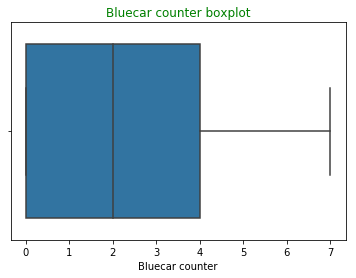

In [9]:
# plotting the Bluecounter boxplot
#
sns.boxplot(x = pr['Bluecar counter'])
plt.title('Bluecar counter boxplot', color = 'g')
plt.show()

There is no outlier in the bluecounter boxplot

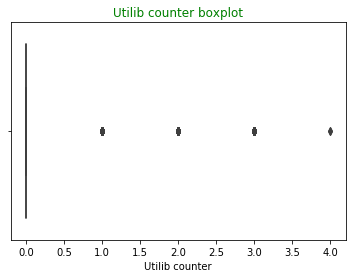

In [10]:
# plotting the Utilib counter boxplot
#
sns.boxplot(x = pr['Utilib counter'])
plt.title('Utilib counter boxplot', color = 'g')
plt.show()

There are lots of outliers that can be seen in the utilib counter boxplot

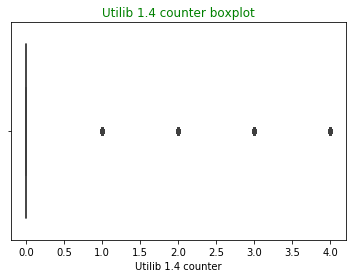

In [11]:
# plotting the Utilib 1.4 counter boxplot
#
sns.boxplot(x = pr['Utilib 1.4 counter'])
plt.title('Utilib 1.4 counter boxplot', color = 'g')
plt.show()

There are lots of outliers  that  is seen in the utilib_14 counter boxplot

###Using Inter Quantile Range to check for and remove outliers

In [13]:
# Checking for outliers using the inter quantile range
#
Q1 = pr.quantile(0.25)
Q3 = pr.quantile(0.75)

IQR = Q3 - Q1

((pr < Q1 - 1.5 * IQR) | (pr > Q3 + 1.5 * IQR))

,Address,Bluecar counter,Cars,Charge Slots,Charging Status,City,Displayed comment,Geo point,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,Unnamed: 0,Utilib 1.4 counter,Utilib counter,day,hour,minute,month,year
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
# Dropping outliers
#
pr = pr[ ~ ((pr < Q1 - 1.5 * IQR) | (pr > Q3 + 1.5 * IQR)).any(axis = 1)]

In [16]:
# Checking the shape of the dataframe after dropping outliers
#
pr.shape

(9526745, 26)

##Consistency

### Identifying duplicated rows

In [17]:
# Checking for and displaying duplicated rows in our table
#
pr[pr.duplicated()]

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
1122,425,97 Rue de Charenton,1,1,0,0,0,operational,Paris,NaN,paris-charenton-97,STATION,"48.8476733, 2.377312",75012,Paris/Charenton/97,operational,NaN,2,station,ok,nonexistent,2018,4,1,0,0
1123,503,17 boulevard Saint-Martin,2,2,0,0,0,nonexistent,Paris,NaN,paris-saintmartin-17,STATION,"48.8681421, 2.360276",75003,Paris/Saint-Martin/17,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
1124,541,1 rue du PrÃ© Saint Gervais,0,0,0,0,0,nonexistent,Pantin,NaN,pantin-presaintgervais-1,SPACE,"48.890711, 2.4030061",93500,Pantin/PrÃ© Saint Gervais/1,broken,NaN,0,full_station,closed,nonexistent,2018,4,1,0,0
1125,614,118 rue Houdan,5,5,0,0,0,operational,Sceaux,NaN,sceaux-houdan-118,STATION,"48.779037, 2.2891934",92330,Sceaux/Houdan/118,operational,NaN,0,station,ok,nonexistent,2018,4,1,0,0
1129,939,7 boulevard d'AlgÃ©rie,0,0,0,0,0,nonexistent,Paris,NaN,paris-algerie-7,STATION,"48.8799263, 2.4004487",75019,Paris/AlgÃ©rie/7,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0
1130,946,192 avenue Pierre Brossolette,1,1,0,0,0,nonexistent,Malakoff,NaN,malakoff-pierrebrossolette-192,STATION,"48.8139, 2.302489",92240,Malakoff/Pierre Brossolette/192,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0
1510,371,3 Avenue de la Gare,5,5,0,0,0,nonexistent,Sceaux,NaN,sceaux-gare-3,SPACE,"48.7793414, 2.2814988",92330,Sceaux/Gare/3,operational,NaN,1,full_station,ok,operational,2018,4,1,0,1
1741,602,124 avenue Pasteur,2,2,0,0,0,nonexistent,Bagnolet,NaN,bagnolet-pasteur-124,STATION,"48.87608, 2.418952",93170,Bagnolet/Pasteur/124,operational,NaN,0,station,ok,nonexistent,2018,4,1,0,1
1757,618,188 avenue de Paris,0,0,0,0,0,nonexistent,ChÃ¢tillon,NaN,chatillon-stalingrad-5,STATION,"48.8102855, 2.2995297",92320,ChÃ¢tillon/Stalingrad/5,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,1
1846,707,27 boulevard de Stalingrad,2,2,0,0,0,nonexistent,Malakoff,NaN,malakoff-stalingrad-27,STATION,"48.8142269, 2.2878426",92240,Malakoff/Stalingrad/27,operational,NaN,5,station,ok,nonexistent,2018,4,1,0,1


### Dropping duplicated rows

In [19]:
# Dropping Duplicates
#
pr = pr.drop_duplicates()

# checking the shape of the dataframe after dropping duplicates
pr.shape

(9432337, 26)

##**Uniformity**

### Dropping irrelevant columns

In [20]:
# Listing all the columns in our table
#
pr.columns

Index(['Unnamed: 0', 'Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'Displayed comment', 'ID', 'Kind', 'Geo point', 'Postal code',
       'Public name', 'Rental status', 'Scheduled at', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [0]:
# Dropping irrelevant columns
# A list of irrelevant columns to be dropped
#
columns_to_drop = ['Unnamed: 0','Address', 'Cars', 'Displayed comment', 'ID', 'Geo point', 'Charge Slots',\
                         'Charging Status', 'Rental status', 'Scheduled at', 'Slots', 'Station type', \
                         'Subscription status', 'year', 'month', 'day', 'minute']

# Dropping the columns
pr.drop(columns_to_drop, inplace  = True, axis = 1)

In [22]:
# Confirming if rows have been dropped
#
pr.columns

Index(['Bluecar counter', 'Utilib counter', 'Utilib 1.4 counter', 'City',
       'Kind', 'Postal code', 'Public name', 'Status', 'hour'],
      dtype='object')

### Checking and removing whitespaces from columns

In [0]:
# Checking and removing whitespaces from columns
# 
strip_col = ['City', 'Kind', 'Public name', 'Status']

for col in strip_col:
    pr[col] = pr[col].str.strip()

In [26]:
# Checking for unique elements in each column
#In order to check for typos
#
for col in strip_col:
    print(pr[col].unique())

['Paris' 'Charenton-le-Pont' 'Puteaux' 'Colombes' 'Villejuif' 'Bagneux'
 'AsniÃ¨res-sur-Seine' 'Villeneuve-la-Garenne' 'Nanterre'
 'Joinville-le-Pont' 'Clamart' 'Issy-les-Moulineaux' 'Saint-Ouen'
 'CrÃ©teil' 'Suresnes' 'ChÃ¢tenay-Malabry' 'Maisons-Alfort' 'Vaucresson'
 'Pantin' 'Gennevilliers' 'Boulogne-Billancourt' 'Malakoff'
 'Rueil-Malmaison' 'Sceaux' 'Cachan' 'Drancy' 'La Garenne-Colombes'
 'Saint-MandÃ©' 'Montrouge' 'Meudon' 'Romainville' 'Arcueil' 'ChÃ¢tillon'
 'Courbevoie' 'Le Bourget' 'Bagnolet' 'Fontenay-aux-Roses' 'SÃ¨vres'
 'Alfortville' "Ville-d'Avray" 'Vanves' 'Limeil-BrÃ©vannes' 'Chaville'
 'Nogent-sur-Marne' 'Neuilly-sur-Seine' 'Le Chesnay'
 'VÃ©lizy-Villacoublay' 'Saint-Maurice' 'Levallois-Perret'
 'Enghien-les-Bains' 'Saint-Cloud' 'Yerres' 'Vincennes'
 'VerriÃ¨res-le-Buisson' 'Meudon-la-ForÃªt' 'Rosny-sous-Bois'
 'Le Plessis-Robinson' 'Noisy-le-Sec' 'Bois-Colombes' 'Neuilly-Plaisance'
 'Argenteuil' 'Montreuil' 'Bezons' 'Antony' 'Dugny' 'Versailles'
 'Les Lilas' 'Bourg-

##Completeness

###Checking for and replacing null values

In [27]:
# Checking for null values in the table
#
pr.isnull().sum()

Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
City                  0
Kind                  0
Postal code           0
Public name           0
Status                0
hour                  0
dtype: int64

In [28]:
# Changing the case of column names to lower, stripping whitespaces, removing periods and replacing spaces with underscore
#
pr.columns = pr.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')

# Confirmng that the dataframe columns have been renamed appriopriately
pr.columns

Index(['bluecar_counter', 'utilib_counter', 'utilib_14_counter', 'city',
       'kind', 'postal_code', 'public_name', 'status', 'hour'],
      dtype='object')

In [31]:
# Adding a usage column for the three car counters i.e bluecar_counter, utilib_counter and utilib_14_counter
# positive number means that a car was returned
# negative number means that a car was picked
# zero means that nothing happened, i.e no car was picked nor returned
#
# creating column for bluecar usage
pr['usage_blue'] = pr.bluecar_counter.diff()

# creating column for utilib usage
pr['usage_utilib'] = pr.utilib_counter.diff()

# creating column for utilib 14 usage
pr['usage_utilib_14'] = pr.utilib_14_counter.diff()

#print the new created columns
pr.head()

,bluecar_counter,utilib_counter,utilib_14_counter,city,kind,postal_code,public_name,status,hour,usage_blue,usage_utilib,usage_utilib_14
3,4,0,0,Paris,STATION,75010,Paris/Claude Vellefaux/3,ok,0,NaN,NaN,NaN
8,4,0,0,Paris,STATION,75012,Paris/Arnold Netter/10,ok,0,0.0,0.0,0.0
10,3,0,0,Paris,STATION,75015,Paris/Houdart de Lamotte/2,ok,0,-1.0,0.0,0.0
11,2,0,0,Paris,STATION,75012,Paris/Saint-Antoine/238,ok,0,-1.0,0.0,0.0
19,1,0,0,Paris,STATION,75005,Paris/Monge/99,ok,0,-1.0,0.0,0.0


## Question 1

In [32]:
##
##What is the most popular hour for returning cars?
# Identifying the most popular hour of the day for picking up a shared electric car (Bluecar)
# in the city of Paris over the month of April 2018
# Usage is negative when picking up cars
#
pr[(pr.city == 'Paris') & (pr.usage_blue < 0)].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

hour
14    82676
Name: hour, dtype: int64

##Question 2

In [41]:
##
##
#What station is the most popular?
#Overall?
#At the most popular picking hour?
# Identifying the the most popular hour for returning cars
# Usage is positive when returning cars
#
pr[pr.usage_blue > 0].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)


hour
18    169516
Name: hour, dtype: int64

##Question 3

In [34]:
##What postal code is the most popular for picking up Bluecars? Does the most popular station belong to that postal code?
#Overall?
#At the most popular picking hour?
# Identifying the station that is the most popular overall
#
pr[(pr.kind == 'STATION') & (pr.status == 'ok')].groupby('public_name')[['kind']].count().sort_values(by = 'kind', ascending  = False).head(1)


,kind
public_name,
Drancy/Marcelin Berthelot/2,12761


## Question 4

In [35]:
# Identifying the postal code which is the most popular for picking up Bluecars - overall
# Usage is negative when picking up cars
#
pr[pr.usage_blue < 0].groupby('postal_code').count()[['usage_blue']].sort_values(by = 'usage_blue', ascending = False).head(1)

,usage_blue
postal_code,
75016,146668


In [36]:
# Identifying the postal code which is the most popular for picking up Bluecars 
#At the most popular picking hour
# Usage is negative when picking up cars
#
pr[(pr.usage_blue < 0) & (pr.hour == 14)].groupby('postal_code').count()[['usage_blue']].sort_values(by = 'usage_blue', ascending = False).head(1)

,usage_blue
postal_code,
75015,6718


## Question 5

In [37]:
##
##Do the results change if you consider Utilib and Utilib 1.4 instead of Bluecars? 
#(that could be asked earlier to push students to write modular code that can be used to query different things)
# Checking whether the utilib_counter had any picking or returning of cars
#
pr.usage_utilib.unique()

array([nan,  0.])

Utilib_counter did not have any activity of picking or dropping of cars
Probably its because this column had so many outliers, which were removed during the cleaning process

In [38]:
# Checking whether the utilib_14 had any picking or returning of cars
#
pr.usage_utilib_14.unique()

array([nan,  0.])

Utilib_14 did not have any activity of picking or dropping of cars
Probably its because this column had so many outliers, which were removed during the cleaning process